In [21]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_Panel|column_description'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    

Toggle code

var_type (8079, 14)
Wall time: 19.7 s


In [66]:


for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:
    print(column_description[val+"W17"])

Lib-Auth value: Young people today don't respect traditional British values
Lib-Auth value: For some crimes, death penalty most appropriate sentence
Lib-Auth value: Schools should teach children to obey authority
Lib-Auth value: Censoring films/magazines necessary to uphold moral standards
Lib-Auth value: Lawbreakers should be given stiffer sentences
Left-right value: Government should redistribute incomes
Left-right value: Big business takes advantage of ordinary people
Left-right value: Ordinary working people do not get their fair share
Left-right value: There is one law for the rich and one for the poor
Left-right value: Management will always try to get the better of employees


In [4]:
search(BES_Panel,"al_scale")

al_scaleW1_W5      37890
al_scaleW6         27288
al_scaleW7_W9      35873
al_scaleW10_W12    30088
al_scaleW13        27253
al_scaleW14W15     31629
al_scaleW16        32671
al_scaleW17        29773
dtype: int64

In [6]:
match(BES_Panel,"al1")

al1W6         30258
al1W13        31136
al1W16        37959
al1W17        34366
al1W1_W5      41874
al1W14W15     36172
al1W7_W9      39857
al1W10_W12    34991
dtype: int64

In [1]:
wave_list = ["W1_W5","W6","W7_W9","W10_W12","W13","W14W15","W16","W17"]
friendly_wave = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Friendlier_Description"]


NameError: name 'BES_file_manifest' is not defined

In [61]:
wts_to_waves = {"wt_full_W1":"W1_W5","wt_full_W2":"W1_W5","wt_full_W3":"W1_W5","wt_full_W4":"W1_W5","wt_full_W4":"W1_W5",
 'wt_full_W5':"W1_W5", 'wt_new_W6':"W6", 'wt_new_W7':"W7_W9", 'wt_new_W8':"W7_W9", 'wt_new_W9':"W7_W9",
 'wt_new_W10':"W10_W12", 'wt_new_W11':"W10_W12", 'wt_new_W12':"W10_W12", 'wt_new_W13_result':"W13",
 'wt_new_W14':"W14W15", 'wt_new_W15':"W14W15", 'wt_new_W16':"W16", 'wt_new_W17':"W17",}

In [97]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
# val = "al1"

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull()
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1


Wall time: 16.3 s


In [113]:
friendly_wave

Wave No
19          2019 GE: Post-Election
18               2019 GE: Campaign
17           2019 GE: Pre-Campaign
16      2019 : Post Euro Elections
15                    2019: Spring
14                    2018: Summer
13          2017 GE: Post-Election
12               2017 GE: Campaign
11           2017 GE: Pre-Campaign
10                    2016: Autumn
9     2016 EU Ref: Post-Referendum
8            2016 EU Ref: Campaign
7        2016: Pre Local Elections
6           2015 GE: Post-Election
5                2015 GE: Campaign
4            2015 GE: Pre-Campaign
3                     2014: Autumn
2                     2014: Summer
1                     2014: Spring
Name: Friendlier_Description, dtype: object

In [121]:
scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)

In [130]:
normalised_store

,value,wave,score
0,Lib-Auth value: Young people today don't respe...,2014: Spring,1.000000
1,Lib-Auth value: Young people today don't respe...,2014: Summer,0.999610
2,Lib-Auth value: Young people today don't respe...,2014: Autumn,0.997612
3,Lib-Auth value: Young people today don't respe...,2015 GE: Pre-Campaign,0.989769
4,Lib-Auth value: Young people today don't respe...,2015 GE: Campaign,0.988540
...,...,...,...
165,Left-right value: Management will always try t...,2017 GE: Post-Election,0.981981
166,Left-right value: Management will always try t...,2018: Summer,0.994917
167,Left-right value: Management will always try t...,2019: Spring,0.986513
168,Left-right value: Management will always try t...,2019 : Post Euro Elections,0.975796


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

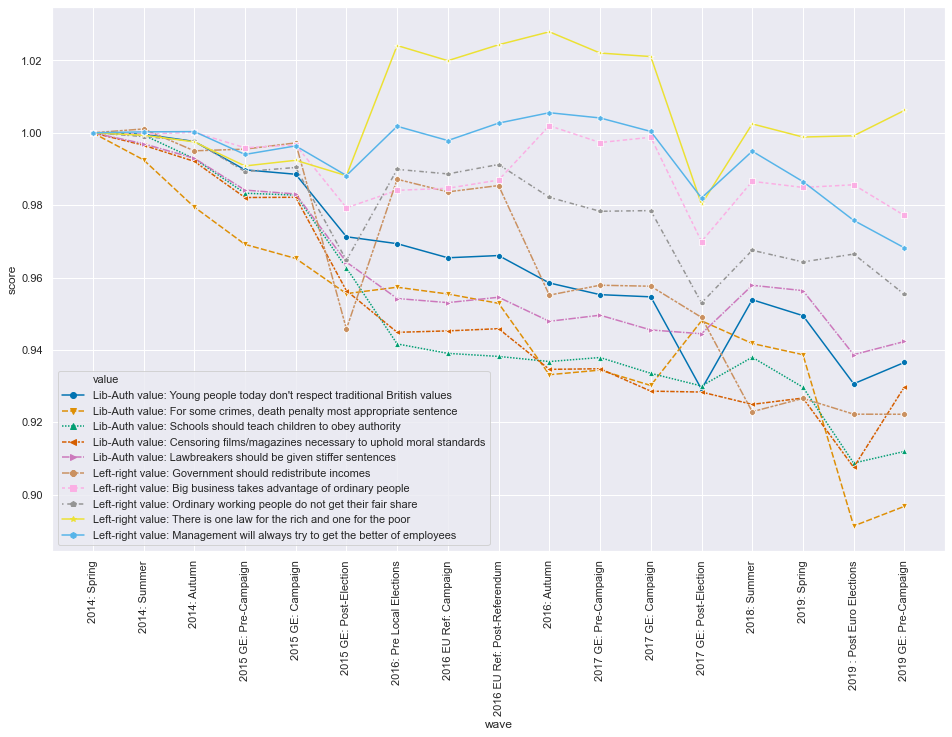

In [123]:
plt.figure(figsize=(16,10));
dash_styles = ["",
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2),
              "",""]
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store,x="wave",y="score",hue="value",
             style="value",markers=filled_markers,dashes=dash_styles,
            );
plt.xticks(rotation=90);
plt.yabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014")

Text(0.5, 1.0, 'Onward March of Liberalism\n(British Election Study Online Panel Data)')

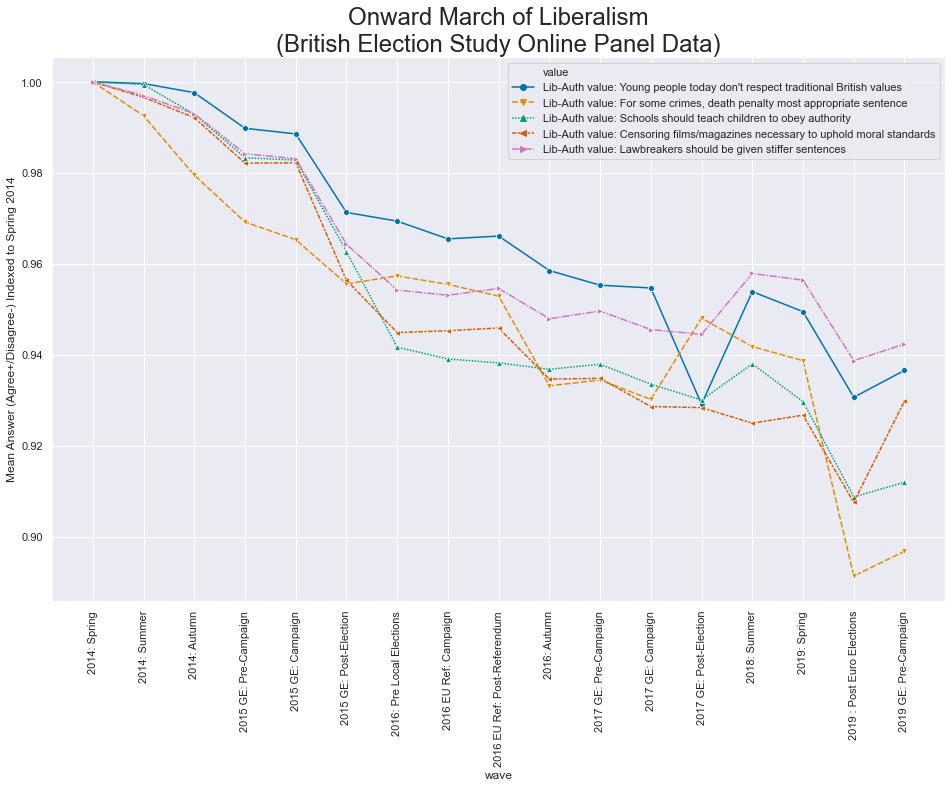

In [134]:
plt.figure(figsize=(16,10));
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Lib-Auth" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=filled_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("Onward March of Liberalism\n(British Election Study Online Panel Data)",fontsize=24)

Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)')

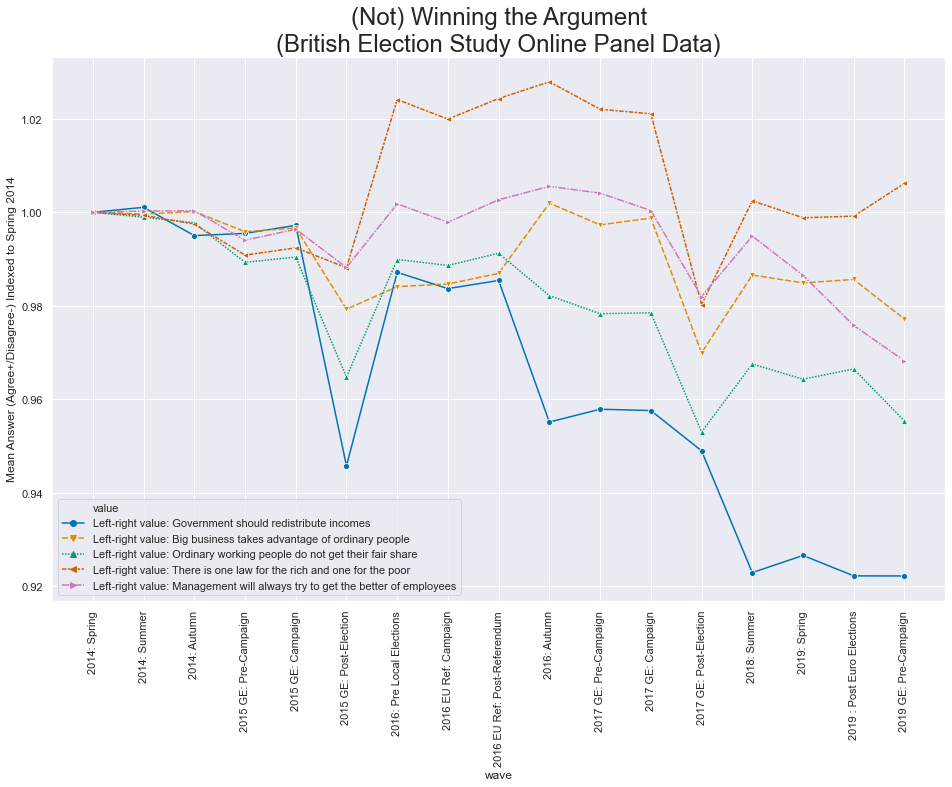

In [135]:
plt.figure(figsize=(16,10));
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Left-right" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=filled_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)",fontsize=24)

In [160]:
mean_lr_scales = BES_Panel[search(BES_Panel,"lr_scale").index].apply(lambda x: x.cat.codes).replace(-1,np.nan).mean(axis=1)
mean_al_scales = BES_Panel[search(BES_Panel,"al_scale").index].apply(lambda x: x.cat.codes).replace(-1,np.nan).mean(axis=1)

In [161]:
mean_al_scale_groups = pd.qcut(mean_al_scales,q=3)
mean_lr_scale_groups = pd.qcut(mean_lr_scales,q=3)

In [162]:
# mean_al_scale_groups.value_counts()

In [163]:
# BES_Panel[search(BES_Panel,"lr_scale").index].apply(lambda x: x.cat.codes).replace(-1,np.nan).mean(axis=1).notnull().sum()

In [164]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_al_scale_groups==mean_al_scale_groups.cat.categories[0]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

Wall time: 6.5 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Socially Liberal 1/3 Public>')

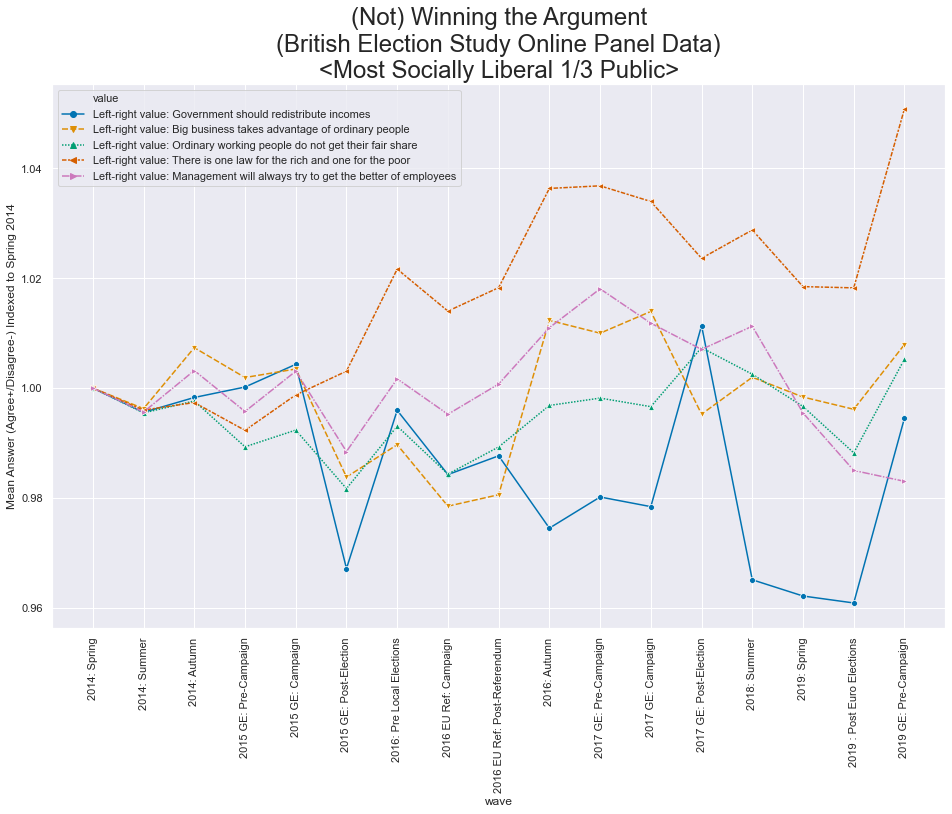

In [165]:
plt.figure(figsize=(16,10));
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Left-right" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=filled_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Socially Liberal 1/3 Public>",fontsize=24)

In [166]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_al_scale_groups==mean_al_scale_groups.cat.categories[1]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

Wall time: 6.43 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Neither Socially Liberal nor Authoritarian 1/3 Public>')

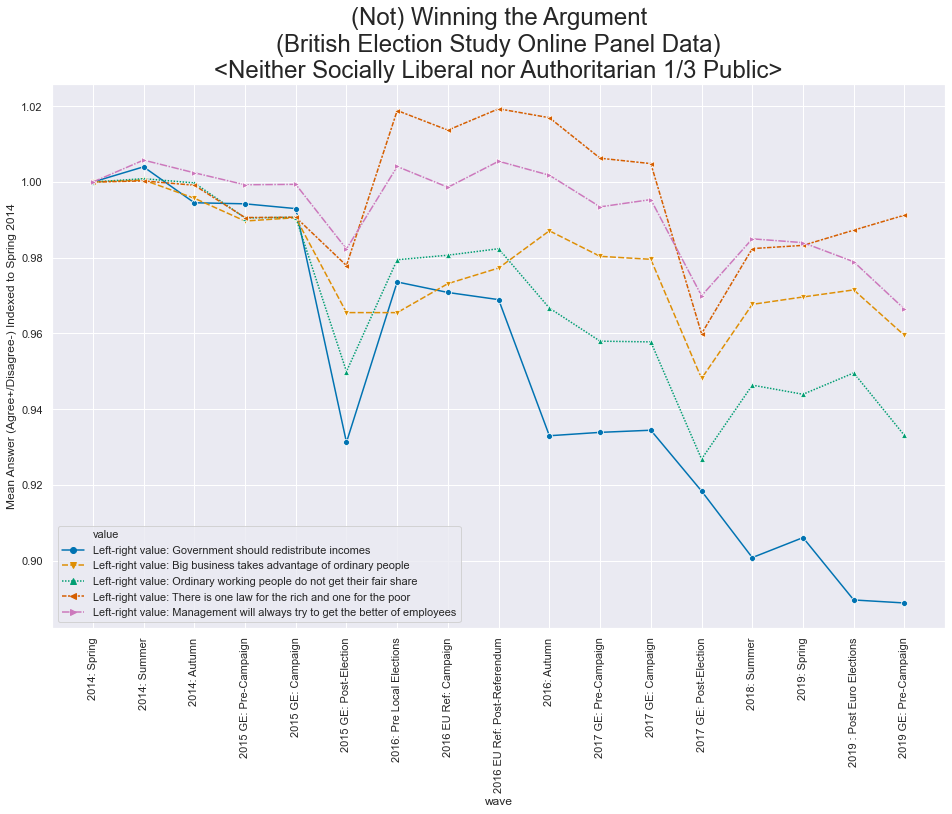

In [167]:
plt.figure(figsize=(16,10));
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Left-right" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=filled_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Neither Socially Liberal nor Authoritarian 1/3 Public>",fontsize=24)

In [168]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_al_scale_groups==mean_al_scale_groups.cat.categories[2]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

Wall time: 6.37 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Authoritarian 1/3 Public>')

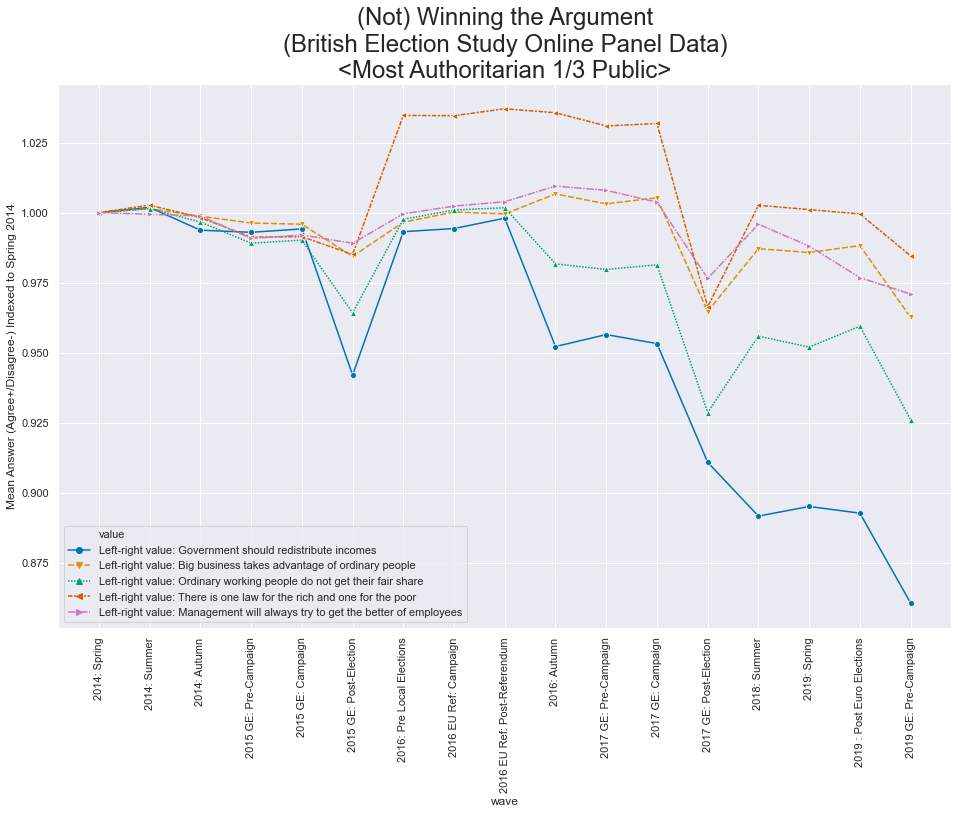

In [169]:
plt.figure(figsize=(16,10));
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Left-right" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=filled_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Authoritarian 1/3 Public>",fontsize=24)

Wall time: 7.05 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Left 1/3 Public>')

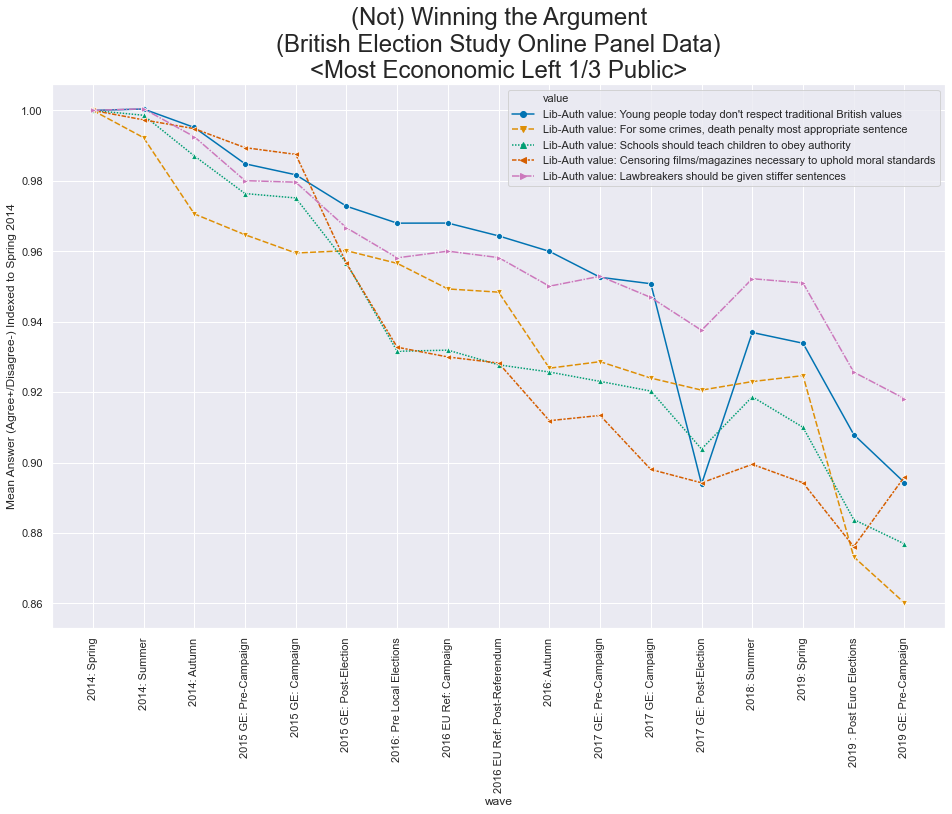

In [170]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_lr_scale_groups==mean_lr_scale_groups.cat.categories[0]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

plt.figure(figsize=(16,10));
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Lib-Auth" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=filled_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Left 1/3 Public>",fontsize=24)

Wall time: 6.17 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Centre 1/3 Public>')

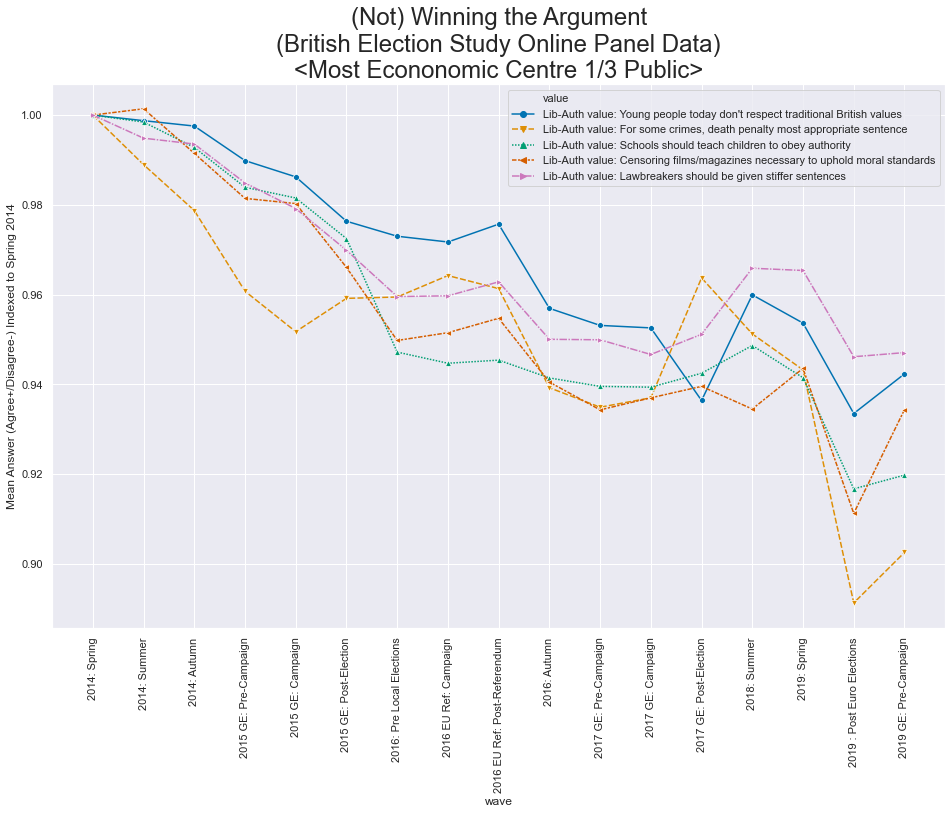

In [171]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_lr_scale_groups==mean_lr_scale_groups.cat.categories[1]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

plt.figure(figsize=(16,10));
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Lib-Auth" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=filled_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Centre 1/3 Public>",fontsize=24)

Wall time: 6.17 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Right 1/3 Public>')

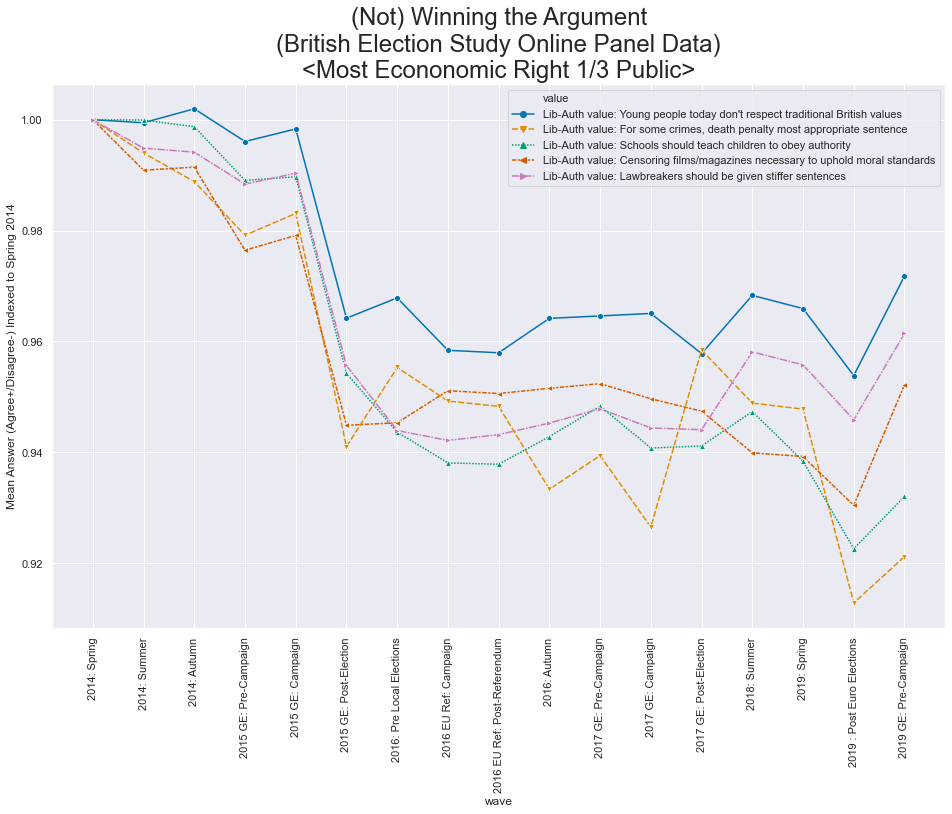

In [172]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_lr_scale_groups==mean_lr_scale_groups.cat.categories[2]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

plt.figure(figsize=(16,10));
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Lib-Auth" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=filled_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Right 1/3 Public>",fontsize=24)

In [173]:
for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:
    display( BES_Panel[[val+x for x in wave_list]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).diff(axis=1).mean() )

al1W1_W5           NaN
al1W6        -0.093565
al1W7_W9      0.002401
al1W10_W12    0.000839
al1W13       -0.085016
al1W14W15     0.085513
al1W16       -0.032174
al1W17        0.017846
dtype: float64

al2W1_W5           NaN
al2W6        -0.141647
al2W7_W9      0.005357
al2W10_W12   -0.011976
al2W13        0.034821
al2W14W15    -0.034010
al2W16       -0.058672
al2W17        0.009794
dtype: float64

al3W1_W5           NaN
al3W6        -0.093807
al3W7_W9     -0.052302
al3W10_W12    0.013224
al3W13       -0.018657
al3W14W15     0.023698
al3W16       -0.055365
al3W17        0.019716
dtype: float64

al4W1_W5           NaN
al4W6        -0.079805
al4W7_W9     -0.020380
al4W10_W12    0.014928
al4W13       -0.007260
al4W14W15    -0.006826
al4W16        0.020551
al4W17        0.052410
dtype: float64

al5W1_W5           NaN
al5W6        -0.094276
al5W7_W9     -0.052588
al5W10_W12   -0.009142
al5W13       -0.002365
al5W14W15     0.033981
al5W16       -0.042267
al5W17        0.014226
dtype: float64

lr1W1_W5           NaN
lr1W6        -0.094984
lr1W7_W9      0.097052
lr1W10_W12   -0.089638
lr1W13       -0.019428
lr1W14W15    -0.067639
lr1W16       -0.004393
lr1W17       -0.016765
dtype: float64

lr2W1_W5           NaN
lr2W6        -0.047743
lr2W7_W9     -0.001234
lr2W10_W12    0.029722
lr2W13       -0.098907
lr2W14W15     0.051227
lr2W16       -0.007689
lr2W17       -0.023801
dtype: float64

lr3W1_W5           NaN
lr3W6        -0.065878
lr3W7_W9      0.064453
lr3W10_W12   -0.020173
lr3W13       -0.085926
lr3W14W15     0.044418
lr3W16        0.000109
lr3W17       -0.039154
dtype: float64

lr4W1_W5           NaN
lr4W6        -0.018692
lr4W7_W9      0.096287
lr4W10_W12    0.021296
lr4W13       -0.137445
lr4W14W15     0.084092
lr4W16        0.015601
lr4W17        0.004277
dtype: float64

lr5W1_W5           NaN
lr5W6        -0.014625
lr5W7_W9      0.027575
lr5W10_W12    0.016433
lr5W13       -0.060249
lr5W14W15     0.040086
lr5W16       -0.008632
lr5W17       -0.006166
dtype: float64

In [29]:
["wt_new_W"+str(x) for x in range(5,20)]

['wt_new_W5',
 'wt_new_W6',
 'wt_new_W7',
 'wt_new_W8',
 'wt_new_W9',
 'wt_new_W10',
 'wt_new_W11',
 'wt_new_W12',
 'wt_new_W13',
 'wt_new_W14',
 'wt_new_W15',
 'wt_new_W16',
 'wt_new_W17',
 'wt_new_W18',
 'wt_new_W19']

In [28]:
search(BES_Panel,"wt_new")

wt_new_W10           30237
wt_new_W11           30956
wt_new_W14           31063
wt_new_W15           30842
wt_new_W16           37959
wt_new_W1_W16         2427
wt_new_W18           37825
wt_new_W6W7          21081
wt_new_W2W6          23163
wt_new_W2W6W7        17076
wt_new_W9_W13        12562
wt_new_W12           34394
wt_new_W1_W11         6473
wt_new_W1_W12         5833
wt_new_W1_W13         5301
wt_new_W6_W11         9373
wt_new_W6_W12         8398
wt_new_W6_W13         7622
wt_new_W11_W13       21520
wt_new_W13W16        14647
wt_new_W13_result    31135
wt_new_W6W16          9587
wt_new_W2W16          8388
wt_new_W17           34366
wt_new_W13W17        15744
wt_new_W6W13W19       8743
wt_new_W9W19         13604
wt_new_W13_W19        5861
wt_new_W13W19        15811
wt_new_W16W19        21840
wt_new_W17W18W19     19000
wt_new_W19_result    32177
wt_new_W9            30036
wt_new_W8            33502
wt_new_W7            30895
wt_new_W6            30073
wt_new_W13W14        20393
w

In [15]:
for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:
    display( BES_Panel[[val+x for x in wave_list]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).diff(axis=1).mean().mean() )

-0.014879498159097643

-0.02804763088121018

-0.023356072820605533

-0.003768952026623625

-0.021776114326487662

-0.027970791783628268

-0.014060689218311424

-0.014593114016764755

0.0093451503316232

-0.0007967559095358189

In [16]:
for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:
    display( BES_Panel[[val+x for x in wave_list]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).diff(axis=1).var().mean() )

0.7057736954471735

0.7070298942643297

0.6308896911628498

0.8551565757962781

0.5552962150375096

0.7880393418556941

0.7174980760496087

0.7345782540169123

0.7396648477695692

0.8230506692799218

In [ ]:
# .1-.2 pts over a 5 year period

# 0-4 scale

# 100 yrs -> takes you across the whole scale

id
1                    Strongly agree
2        Neither agree nor disagree
3                             Agree
4                             Agree
5                             Agree
                    ...            
98447                           NaN
98448                           NaN
98449                           NaN
98450                           NaN
98451                           NaN
Name: al1W1_W5, Length: 97006, dtype: category
Categories (6, object): [Strongly disagree < Disagree < Neither agree nor disagree < Agree < Strongly agree < Don't know]

In [174]:
max_date= "2020.05.01"

In [177]:
import datetime
date = datetime.datetime.strptime(max_date, "%Y.%m.%d")

In [179]:
date.ctime()

'Fri May  1 00:00:00 2020'